## Data Cleaning Lab 

This lab notebook discusses some of the concepts of data cleaning and data exploration, 
mainly how to deal with NA values. 
The dataset used here contains data on water consumption per user (in cubic meters) from 2009 to 2016, 
type of user (e.g. industrial, housing, public infrastructure, etc.) and some other details. 
It poses a challenge to treat NAs and missing values in a way that do not distort the overall dataset. 

Load the csv file into a pandas dataframe

**`Reference: `**
- [Scikit Data Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
- [A video on Pandas for Data Analysis](https://vimeo.com/59324550)
- [Pandas.read_csv()](http://chrisalbon.com/python/pandas_dataframe_importing_csv.html)

In [1]:
import pandas as pd
import csv
import numpy as np

agua_data = pd.read_csv('/dsa/data/all_datasets/water-consumption-in-a-median-size-city/AguaH.csv',low_memory=False)
agua_data[:2]

,USO2013,TU,DC,M,UL,f.1_ENE_09,f.1_FEB_09,f.1_MAR_09,f.1_ABR_09,f.1_MAY_09,...,f.1_MAR_15,f.1_ABR_15,f.1_MAY_15,f.1_JUN_15,f.1_JUL_15,f.1_AGO_15,f.1_SEP_15,f.1_OCT_15,f.1_NOV_15,f.1_DIC_15
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0


### The dataset


Checkout **[this](https://www.kaggle.com/marcomolina/water-consumption-in-a-median-size-city)** page for information on dataset. 

In [2]:
list(agua_data)

['USO2013',
 'TU',
 'DC',
 'M',
 'UL',
 'f.1_ENE_09',
 'f.1_FEB_09',
 'f.1_MAR_09',
 'f.1_ABR_09',
 'f.1_MAY_09',
 'f.1_JUN_09',
 'f.1_JUL_09',
 'f.1_AGO_09',
 'f.1_SEP_09',
 'f.1_OCT_09',
 'f.1_NOV_09',
 'f.1_DIC_09',
 'f.1_ENE_10',
 'f.1_FEB_10',
 'f.1_MAR_10',
 'f.1_ABR_10',
 'f.1_MAY_10',
 'f.1_JUN_10',
 'f.1_JUL_10',
 'f.1_AGO_10',
 'f.1_SEP_10',
 'f.1_OCT_10',
 'f.1_NOV_10',
 'f.1_DIC_10',
 'f.1_ENE_11',
 'f.1_FEB_11',
 'f.1_MAR_11',
 'f.1_ABR_11',
 'f.1_MAY_11',
 'f.1_JUN_11',
 'f.1_JUL_11',
 'f.1_AGO_11',
 'f.1_SEP_11',
 'f.1_OCT_11',
 'f.1_NOV_11',
 'f.1_DIC_11',
 'f.1_ENE_12',
 'f.1_FEB_12',
 'f.1_MAR_12',
 'f.1_ABR_12',
 'f.1_MAY_12',
 'f.1_JUN_12',
 'f.1_JUL_12',
 'f.1_AGO_12',
 'f.1_SEP_12',
 'f.1_OCT_12',
 'f.1_NOV_12',
 'f.1_DIC_12',
 'f.1_ENE_13',
 'f.1_FEB_13',
 'f.1_MAR_13',
 'f.1_ABR_13',
 'f.1_MAY_13',
 'f.1_JUN_13',
 'f.1_JUL_13',
 'f.1_AGO_13',
 'f.1_SEP_13',
 'f.1_OCT_13',
 'f.1_NOV_13',
 'f.1_DIC_13',
 'f.1_ENE_14',
 'f.1_FEB_14',
 'f.1_MAR_14',
 'f.1_ABR_14',
 

### Data : Imputing Missing Values


Many methods for imputing missing data are available but which one to select is often a hard question to answer. 
It will depend on the degree to which data is missing in the whole dataset,
whether dataset has a property of continuity, 
whether the number of complete samples is sufficient to predict and test various imputation methods. 
Have a look at the dataset, analyze it and try different imputation methods to determine which ones to use.

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
# from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

There are 89 columns in which 84 are monthly water consumption values from Jan 2009 to Dec 2015. Other columns are explained [here](../resources/water-consumption-in-a-median-size-city_readme.txt). The data is from a city in the northern part of Mexico (Sonora). So the column names are in spanish. The column, ENE_09 is water consumption for January of 2009, and so on and so forth. Rename the columns in english for better readability. 

Convert column names something like this **f.1_ENE_09** to this **2009-01**. 

In [4]:
# lookup is a dictionary that will return values based on supplied key.
lookup = {'ENE':'01','FEB':'02','MAR':'03','ABR':'04','MAY':'05','JUN':'06','JUL':'07','AGO':'08','SEP':'09','OCT':'10','NOV':'11','DIC':'12'}

# cols_list is a list to store all column values
col_list=[]

# "agua_data.columns" will give all column names. we are interested in columns 6 and so on. so the index 5 is specified 
# to select columns 6 and above
for col in agua_data.columns[5:]:
    col = col[4:].split('_')   # the first three characters in column names "f.1_" are junk. so "col[4:]" will read 
                               # data from 5th character. Names are split based on '_'. 
                               # So f.1_ENE_09 is split as col[0]=f.1 col[1]=ENE col[2]=09 
                               # col will become an array of size depending on number of splits. 
    col_list.append('20'+col[1]+'-'+lookup[col[0]])  # Here we are appending 20 + 09 + - + 01 to give "2009-01".

     
columns = ['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16']+col_list  # The list of first five column names and the 
                                                                         # generated column names are added to "columns".

# Rename dataframe column names with new names. 
agua_data.columns=columns
agua_data.head()

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009-01,2009-02,2009-03,2009-04,2009-05,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,NaN,30.0,30.0,30.0,30.0,...,11.0,13.0,16.0,14.0,15.0,16.0,13.0,17.0,17.0,11.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,NaN,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,8.0,8.0,10.0,12.0,9.0,6.0,3.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,NaN,NaN,NaN,NaN,NaN,...,17.0,20.0,16.0,16.0,18.0,18.0,17.0,17.0,18.0,9.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0


**Reference: ** [Data Carpentry - slicing and dicing dataframes](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

### Handling missing data

The below piece of code will find number of rows with null values. 
The visualization categorizes rows into groups by the number of NaN values in the rows. 
`Bins = [0,1,10,20,0,40,50,60,70,80,90]` is used to represent rows with percentage of missing values.

In [5]:
agua_data.shape

(178597, 89)

There are 178597 rows in the dataset.

<img src='../images/axis.PNG'>

The proportion of entries with non-NaN values is 79.06%


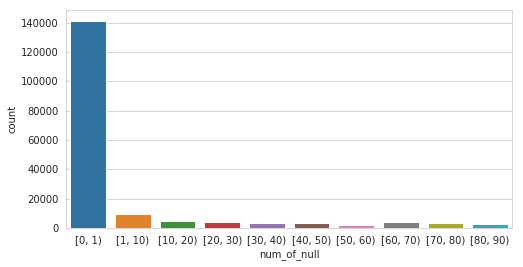

In [6]:
## Countplot for the number of NaN values for each entry

# Select the data starting from 0th row and from 5th column into num_data variable.
num_data = agua_data.iloc[0:, 5:]

# create a column named "num_of_null" to store the count of columns with null values. isnull() will return 0 for false 
# and 1 for true. Adding all 0's and 1's will give number of columns with null values.  
num_data['num_of_null'] = num_data.isnull().sum(axis=1)

# Finding the percentage of complete rows with no NAN values. 
# Here we are counting rows by using len(), where num_null=0 implies rows are complete. 
# This number of divided by total number of rows gives the proportion of non null rows.
print('The proportion of entries with non-NaN values is {:.2f}%'.format(len(num_data[num_data.num_of_null==0])/len(num_data)*100))

# Forms bins to plot a count plot 
bins = [0,1,10,20,30,40,50,60,70,80,90]

# make bins of data in num_of_null using pandas.cut() function. The bin ranges are specified in bins variable.  
cut = pd.cut(num_data.num_of_null, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)


In [39]:
type(cut)

pandas.core.series.Series

In [7]:
cut.to_frame().head(2)

,num_of_null
0,"[0, 1)"
1,"[1, 10)"


Nearly 80% of the rows don't have any NaN values. 
The rows that are complete will help in predicting the missing data to be filled in. 
The below plot shows how the null values are distributed throughout the columns from Jan 09 to Dec 15. 
This will help in understanding if some columns have more NaN values than others and if there are any trends between columns.

** Related Reading:** [Binning data in pandas - pandas.cut()](http://benalexkeen.com/bucketing-continuous-variables-in-pandas/)


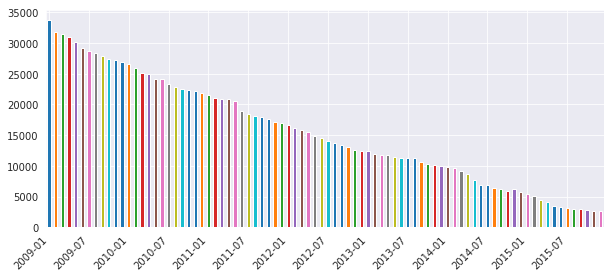

In [8]:
## Plot graphs to show how values for each entry evolves with time
# Here "num_of_null" column is being dropped and at the same time sum of 0's and 1's from isnull() function are being 
# added column wise i'e each month.
num_of_null_each_month = num_data.drop('num_of_null', axis=1).isnull().sum()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))

# A bar graph representing number of null value cells in each column.
pbar = num_of_null_each_month.plot.bar()

# The first argument to xticks is the position of tick marks. Second argument is actual labels to be displayed at those positions
plt.xticks(list(range(0,len(num_of_null_each_month.index),6)), list(num_of_null_each_month.index[0::6]), rotation=45, ha='right')
plt.show()

Columns with missing values decrease with time. 
It could mean that data is either not available in earlier times or water is not in service in some areas at certain times. 
More data is measured towards year-end of 2015. 
It could be because more data is measured or water service in available. 
Other possible factors that don't go with these assupmtions may include random missing data, stop in water service, etc. 
Further analysis is needed to answer if this is due to data missed during the service time or due to the fact that water is simply not in service.

### Data Imputation

In [9]:
# Below method returns the index of the column (i'e one of 0-83) where the first non-NA number appeared in the row. 
# If all are NAN values then, 84 is returned
def FirstNonNull(row):
    count=0
    for col in row:
        if col==False: return count # check if a value exists in the cell. return 
        else: count = count+1
    return count


# Below method returns the index of the column (i'e one of 0-83) where the last non-NA number appeared in the row. 
# If there are no NAN values then, then -1 is returned
def LastNonNull(row):
    count=0
    flag=-1
    for col in row:
        if col==False:  # check if a value exists in the cell. stored cell number where NAN occured.
            flag=count  # Return the last cell where NAN occured. 
            count=count+1
        else: count=count+1
    return flag

The above two functions return indexes of the first and last non-NaN values in rows. 
Basically it will tell if water service begins later than Jan 2009 or ends before Dec 2015. 

We can then create a new column called **"NullInService"** that shows the number of NaN values in rows that occur during each serivce period. 
It does not count for null values when water is not in service (in other words, before the first non-null and after the last non-null).

In [10]:
## Below function is for the cases of all NaN entries (NullinService value becomes 0 from -83)
def Setzero(x):
    if x<0: return 0
    else: return x

## Number of NaN values before service period
Total_data = agua_data.iloc[:,0:5]
Total_data = pd.concat([Total_data, num_data], axis=1)

Total_data['FirstNonNull'] = num_data.copy().drop(['num_of_null'], axis=1).isnull().apply(FirstNonNull,axis=1)
Total_data['LastNonNull'] = num_data.copy().drop(['num_of_null'],axis=1).isnull().apply(LastNonNull,axis=1)
Total_data['NullInService'] = Total_data.num_of_null - Total_data.FirstNonNull - (len(num_data.columns)-1-Total_data.LastNonNull) +1    
Total_data['NullInService'] = Total_data['NullInService'].apply(Setzero)
Total_data.NullInService.value_counts(sort=False).head(6) ## Print only head values

0    173773
1      3894
2       489
3       197
4        80
5        45
Name: NullInService, dtype: int64

The numbers above are interesting. 
Initially we observed the proportion of rows with NANs' was around 20% of the total number of rows. 
But the column "NullInService" tells us less than 3% of entire dataset rows have NAN values "during" the service period. 

Nan values during the service period means that data is missing, abnormally.
The data can be grouped into 3 categories:
- complete entries (without NaNs)
- entries that start service later or end service earlier (with NaNs at both edges but not during the service period)
- entries with NaNs within the service period (lets call these "interrupted")

In [11]:
long_data = Total_data[Total_data.num_of_null==0]
short_data = Total_data[(Total_data.num_of_null>0) & (Total_data.NullInService==0)]
interrupted_data = Total_data[(Total_data.NullInService)>0]
null_data = Total_data[(Total_data.num_of_null>0) & (Total_data.NullInService>=0)]
print('Length of 3 groups: (Non-NA Group, Edge-NA Group, Interrupted Group, null data) = ({}, {}, {}, {})'.format(len(long_data), len(short_data), len(interrupted_data), len(null_data)))

Length of 3 groups: (Non-NA Group, Edge-NA Group, Interrupted Group, null data) = (141205, 32568, 4824, 37392)


### Basic imputation methods

There are many ways of imputating missing data. 
Basic ones are - mean, median, most frequent value (mode), forward fill and backward fill, and more.
While some of the advanced methods are - linear, quadratic, akima, spline, K-nearest neightbour, etc. 
The basic ones listed above are provided by the package `sklearn.preprocessing.Imputer` and `Pandas.DataFrame.fillna` APIs. 
They are simple but very powerful. 
Forward fill and backward fill methods need to be complemented by each other as NaN values at head or tail cannot be filled in with only one method.

As per above results, `long_data` has data which are complete. 
They dont need any imputation of data. 
`short_data` has observations where water service has started later or service has stopped earlier. 
They dont have any missing values in between. 
So they don't need any data imputation. 
However `interrupted_data` have missing values. 


The below code segments demonstrate how to fill NA values using different methods. 

Please carefully read through them and try some after re-running the cells above.

In [12]:
# Mean
num_data_mean = num_data.copy()
imp_mean = Imputer(missing_values='NaN', strategy='mean', axis=1, copy=False)
imp_mean.fit_transform(num_data_mean)


# Median
# num_data_median = num_data.copy()
# imp_median = Imputer(missing_values='NaN', strategy='median', axis=1, copy=False)
# imp_median.fit_transform(num_data_median)

# Mode (most frequent)
# num_data_mfreq = num_data.copy()
# imp_mfreq = Imputer(missing_values='NaN', strategy='most_frequent', axis=1, copy=False)
# imp_mfreq.fit_transform(num_data_mfreq)

# Forward and Backward Fill
# ## NaN values at head can't be filled with ffill so complement with bfill
# num_data_ffill = num_data.copy()
# imp_ffill = num_data_ffill.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1) 
# imp_ffill
# # ## NaN values at tail can't be filled with bfill so complement with ffill
# num_data_bfill = num_data.copy()
# imp_bfill = num_data_bfill.fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)
# imp_bfill



/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  2.00000000e+01,   2.00000000e+01,   2.00000000e+01, ...,
          2.20000000e+01,   2.10000000e+01,   0.00000000e+00],
       [  2.48809524e+01,   3.00000000e+01,   3.00000000e+01, ...,
          1.70000000e+01,   1.10000000e+01,   1.00000000e+00],
       [  1.22173913e+01,   1.22173913e+01,   1.22173913e+01, ...,
          6.00000000e+00,   3.00000000e+00,   6.20000000e+01],
       ..., 
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00],
       [  2.57400000e+03,   1.68500000e+03,   1.14100000e+03, ...,
          4.75600000e+03,   4.43500000e+03,   0.00000000e+00]])

In [13]:
# Mean imputation

# itrp has all rows and columns 6 to the end, where the water service is interrupted.
itrp_shrt = null_data.copy()[(null_data.NullInService>=0) & (null_data.NullInService<=84)].iloc[:,5:]

# Define imputation transformer for completing missing values.
itrp_shrt_mean = Imputer(missing_values='NaN', strategy='mean', axis=1, copy=False)

# Get the first five columns and save it in head to append to modified data.
head_cols = null_data.copy()[(null_data.NullInService>=0) & (null_data.NullInService<=84)].iloc[:,0:5]

# concatenate the two dataframes "head" and "itrp"(which will have modified data after applying impute transformer) column wise
# "itrp_mean.fit_transform(itrp)" will give n-dimensional array which needs to be converted to a dataframe as have same indexes 
# as itrp
result_fill = pd.concat([head_cols, pd.DataFrame(itrp_shrt_mean.fit_transform(itrp_shrt),index=itrp_shrt.index)],axis=1)
result_fill.shape

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(37392, 93)

In [14]:
result_fill.head(5)

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,0,1,2,3,4,...,78,79,80,81,82,83,84,85,86,87
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,24.988506,30.000000,30.000000,30.000000,30.000000,...,15.0,16.0,13.0,17.0,17.0,11.0,1.0,1.0,83.0,0.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,16.384615,16.384615,16.384615,16.384615,16.384615,...,8.0,10.0,12.0,9.0,6.0,3.0,62.0,62.0,83.0,0.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,17.285714,17.285714,17.285714,17.285714,17.285714,...,18.0,18.0,17.0,17.0,18.0,9.0,18.0,18.0,83.0,0.0
10,H3,DOMESTICO BAJA,0.5,NaN,NaN,29.583333,29.583333,29.583333,29.583333,29.583333,...,15.0,15.0,15.0,15.0,15.0,15.0,76.0,76.0,83.0,0.0
11,H3,DOMESTICO BAJA,0.5,NaN,NaN,29.583333,29.583333,29.583333,29.583333,29.583333,...,15.0,15.0,15.0,15.0,15.0,15.0,76.0,76.0,83.0,0.0


We can now combine `long_data`, `short_data` and the imputed data into result_fill to form the complete dataset. Verify the length is same as original data.

In [15]:
# The column names of result_fill have changed. Give them the same names as agua_data. 
columns = ['LANDUSE_TYPE','USER','PIPE DIAM','VENDOR','JAN16'] + col_list + ['num_of_null','FirstNonNull','LastNonNull','NullInService'] 

# Rename columns 
result_fill.columns=columns
result_fill.head()

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009-01,2009-02,2009-03,2009-04,2009-05,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null,FirstNonNull,LastNonNull,NullInService
1,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,307.0,24.988506,30.000000,30.000000,30.000000,30.000000,...,15.0,16.0,13.0,17.0,17.0,11.0,1.0,1.0,83.0,0.0
2,H3,DOMESTICO RESIDENCIAL,0.5,MSDELAUNET,179.0,16.384615,16.384615,16.384615,16.384615,16.384615,...,8.0,10.0,12.0,9.0,6.0,3.0,62.0,62.0,83.0,0.0
3,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,852.0,17.285714,17.285714,17.285714,17.285714,17.285714,...,18.0,18.0,17.0,17.0,18.0,9.0,18.0,18.0,83.0,0.0
10,H3,DOMESTICO BAJA,0.5,NaN,NaN,29.583333,29.583333,29.583333,29.583333,29.583333,...,15.0,15.0,15.0,15.0,15.0,15.0,76.0,76.0,83.0,0.0
11,H3,DOMESTICO BAJA,0.5,NaN,NaN,29.583333,29.583333,29.583333,29.583333,29.583333,...,15.0,15.0,15.0,15.0,15.0,15.0,76.0,76.0,83.0,0.0


In [16]:
# concatnate Total_data where there were no null values during service and the imputed data in result_fill
final_result = Total_data[(Total_data.num_of_null)==0].append(result_fill)

# Verify the size of final_result. It should be same as agua_data. Extra columns in final_result are the ones created
# for analysis. 
print(final_result.shape)
print(agua_data.shape)
final_result

(178597, 93)
(178597, 89)


,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009-01,2009-02,2009-03,2009-04,2009-05,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null,FirstNonNull,LastNonNull,NullInService
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,20.000000,20.000000,20.000000,20.000000,20.000000,...,7.000000,7.000000,42.000000,27.0,22.0,21.0,0.0,0.0,83.0,0.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.000000,20.000000,20.000000,20.000000,20.000000,...,28.000000,31.000000,27.000000,27.0,27.0,24.0,0.0,0.0,83.0,0.0
5,H3,DOMESTICO MEDIO,0.5,NaN,NaN,20.000000,20.000000,20.000000,20.000000,20.000000,...,19.000000,19.000000,19.000000,18.0,18.0,24.0,0.0,0.0,83.0,0.0
6,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,20.000000,20.000000,20.000000,20.000000,20.000000,...,17.000000,17.000000,17.000000,17.0,17.0,24.0,0.0,0.0,83.0,0.0
7,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,702.0,30.000000,10.000000,30.000000,20.000000,30.000000,...,29.000000,22.000000,27.000000,26.0,33.0,32.0,0.0,0.0,83.0,0.0
8,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,271.0,20.000000,20.000000,20.000000,20.000000,20.000000,...,5.000000,7.000000,16.000000,7.0,7.0,4.0,0.0,0.0,83.0,0.0
9,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,19.000000,21.000000,21.000000,22.000000,26.000000,...,3.000000,3.000000,3.000000,3.0,3.0,24.0,0.0,0.0,83.0,0.0
12,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,486.0,9.000000,12.000000,13.000000,13.000000,22.000000,...,34.000000,39.000000,52.000000,33.0,27.0,27.0,0.0,0.0,83.0,0.0
15,H3,DOMESTICO MEDIO,0.5,CICASA MMD-15 S,199.0,14.000000,14.000000,14.000000,14.000000,14.000000,...,6.000000,5.000000,5.000000,5.0,4.0,5.0,0.0,0.0,83.0,0.0
16,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,0.0,20.000000,20.000000,20.000000,20.000000,20.000000,...,0.000000,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,83.0,0.0


### Finding outliers

Outliers are values that are way off from most of the other values in a variable. 
The below code segment will return all rows where pipe `diam` is greater than 3 standard deviations from average. 
Other columns also have values way off from average values. 
If the column has NAN values then they return nothing when the code is run.   

Note: We are using the Z-score (from your statistical analysis course)

In [17]:
from scipy import stats
final_result[(np.abs(stats.zscore(final_result[["PIPE DIAM"]])) > 3).all(axis=1)]

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009-01,2009-02,2009-03,2009-04,2009-05,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null,FirstNonNull,LastNonNull,NullInService
412,MX,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
506,MX,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
786,AVD,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
1064,H1,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
1449,H3,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
1524,AVD,COMERCIAL,2.0,DOROT,396.0,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,0.0,0.0,83.0,0.0
1576,MX,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
1646,MX,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
1666,H1,COMERCIAL,3.0,ADCOM,6614.0,2574.000000,1685.000000,1141.000000,1316.000000,1521.000000,...,6444.000000,5783.000000,6476.000000,3123.000000,4756.000000,4435.000000,0.0,0.0,83.0,0.0
1930,MX,COMERCIAL,1.5,KENT,49366.0,436.000000,479.000000,609.000000,548.000000,432.000000,...,199.000000,207.000000,292.000000,430.000000,216.000000,423.000000,0.0,0.0,83.0,0.0


All of the rows returned seems legit, as they are commercial lines. 

### Visualization 
Now, we can plot variables "2009-01" and "2009-02" on a scatter plot and look for any outliers.

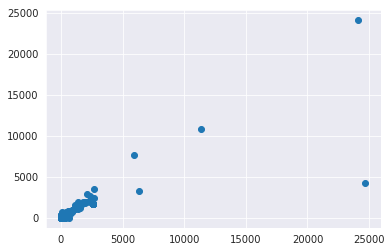

In [18]:
%matplotlib inline  

plt.scatter(final_result[["2009-01"]], final_result[["2009-02"]])

In [19]:
final_result.loc[final_result['2009-01'] > 5000]

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009-01,2009-02,2009-03,2009-04,2009-05,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,num_of_null,FirstNonNull,LastNonNull,NullInService
2638,IRA,INDUSTRIAL,10.0,ENDRESS-HOUSER,61290.0,24692.0,4215.0,23531.0,26236.0,42420.0,...,24809.0,19885.0,5521.0,3175.0,34863.0,34597.0,0.0,0.0,83.0,0.0
84648,EQ,COMERCIAL,2.0,ELSTER,79135.0,6340.0,3282.0,2901.0,3717.0,3676.0,...,4098.0,4883.0,4820.0,4354.0,3682.0,491.0,0.0,0.0,83.0,0.0
118233,MX,COMERCIAL,0.5,ELSTER,34747.0,24130.0,24130.0,24130.0,24130.0,24130.0,...,184.0,130.0,183.0,156.0,156.0,156.0,0.0,0.0,83.0,0.0
127615,EQ,COMERCIAL,4.0,MENECKE,367243.0,5958.0,7632.0,5465.0,6563.0,4632.0,...,6458.0,8780.0,2981.0,3274.0,2806.0,267.0,0.0,0.0,83.0,0.0
150354,H3,DOMESTICO BAJA,0.5,NaN,NaN,11385.0,10911.0,10726.0,11058.0,10996.0,...,24.0,24.0,24.0,24.0,24.0,24.0,1.0,0.0,83.0,1.0


Again the data points that seem like outliers are not really outliers except for one which is a domestic connection.  
The others belong to commercial water connections. 

### Aggregation

Often we may want to combine two or more attributes to reduce dimensions and make the data more manageable. 
Here the water usage data for months of the years can be combined into years. 

In [20]:
aggregate=final_result.copy().iloc[:,0:5]

temp1=final_result.copy().iloc[:,5:17]
temp2=final_result.copy().iloc[:,18:29]
temp3=final_result.copy().iloc[:,30:41]
temp4=final_result.copy().iloc[:,42:53]
temp5=final_result.copy().iloc[:,54:65]
temp6=final_result.copy().iloc[:,66:77]
temp7=final_result.copy().iloc[:,78:89]

aggregate['2009']=temp1.sum(axis=1)
aggregate['2010']=temp2.sum(axis=1)
aggregate['2011']=temp3.sum(axis=1)
aggregate['2012']=temp4.sum(axis=1)
aggregate['2013']=temp5.sum(axis=1)
aggregate['2014']=temp6.sum(axis=1)
aggregate['2015']=temp7.sum(axis=1)
aggregate.head(5)

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009,2010,2011,2012,2013,2014,2015
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,240.0,220.0,150.0,110.0,157.0,20.0,132.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,240.0,220.0,220.0,220.0,240.0,316.0,304.0
5,H3,DOMESTICO MEDIO,0.5,NaN,NaN,201.0,231.0,294.0,182.0,201.0,211.0,209.0
6,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,240.0,220.0,384.0,337.0,221.0,186.0,192.0
7,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,702.0,330.0,330.0,206.0,125.0,50.0,73.0,259.0


Again, plotting the variables "2009" and "2010" on a scatter plot, we can look for outliers.

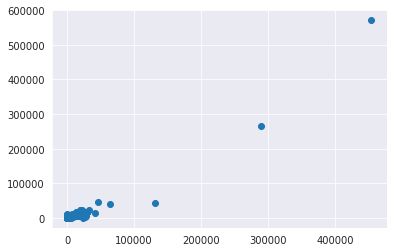

In [21]:
plt.scatter(aggregate[["2009"]], aggregate[["2010"]])

### Sampling 

Sampling the dataset to obtains a smaller version of data is often useful in analysing and exploring the data.
It is very expensive and time consuming to run statistics on giant datasets in the process of understanding the data. 
If the sample is extracted correctly it should have the same characteristics as originaldataset. 

In [22]:
# Randomly select 10% of the observations to form a sample
sample = final_result.sample(frac=0.1, replace=True)
sample.shape

(17860, 93)

**Reading and Reference: **
- [sampling with pandas](http://nikgrozev.com/2015/06/16/fast-and-simple-sampling-in-pandas-when-loading-data-from-files/)
- [pandas.sample()](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.DataFrame.sample.html)

### Dimensionality Reduction

In prior courses you have experience the use of Principal Components Analysis (PCA) as a feature reduction method.
Often, reducing the dimensions of the data can aid in exploratory visual analysis.
Additionally, data that is projected into fewer diminsions can have reduced processing time and memory usage. 

#### PCA

The below code sample performs PCA function using `scikit learn`.

In [23]:
from sklearn.decomposition import PCA

pca_input = final_result.copy().iloc[:,5:89]
pca = PCA(n_components=5)
pca.fit(pca_input)

print(pca.explained_variance_ratio_) 

[  9.58161334e-01   3.52799409e-02   5.00002132e-03   4.63894342e-04
   2.09431951e-04]


**PCA References: ** 
- [PCA in python](https://districtdatalabs.silvrback.com/principal-component-analysis-with-python)
- [PCA explained in both R and python](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/)

### Summary statistics
We can always ask pandas to describe a dataframe to generate the most basic descriptive statistics.

In [24]:
final_result.iloc[:,5:89].describe()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
count,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,...,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000,178597.000000
mean,56.299025,42.958360,34.755667,37.985636,41.894241,53.662383,57.708231,69.127777,73.760581,84.614078,...,86.792946,80.665884,90.191169,85.352655,110.208733,100.329346,110.038333,61.787238,85.632171,79.146035
std,316.948753,210.343949,159.950159,180.440752,216.134709,308.672655,336.540163,424.529589,467.349129,555.279112,...,598.029836,528.425855,617.321213,568.095108,765.876756,687.102650,767.826110,369.907698,569.292986,531.634374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,12.000000,11.000000,12.000000,12.924528,12.000000,12.230769,12.333333,12.000000,12.000000,...,9.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000
50%,19.000000,18.000000,18.000000,18.000000,19.000000,18.375000,19.000000,19.000000,18.687500,18.220339,...,15.000000,18.000000,15.000000,16.000000,17.000000,16.000000,16.000000,16.000000,16.000000,14.000000
75%,23.000000,23.000000,22.000000,23.000000,24.000000,23.000000,24.000000,25.000000,23.000000,23.000000,...,22.000000,24.000000,22.000000,23.000000,24.000000,23.000000,23.000000,23.000000,23.000000,22.000000
max,24692.000000,24130.000000,24130.000000,26236.000000,42420.000000,44505.000000,48029.000000,49922.000000,48978.000000,49915.000000,...,55162.000000,50955.000000,49325.000000,31328.000000,24809.000000,19885.000000,9785.000000,5185.000000,34863.000000,34597.000000


Additionally, various visualizations can help us understand the relationships in the data as well as the shapes inherent in the data fields.

Below are some samples of data visualizations that are exploring the basics descriptive statistics fo the data.

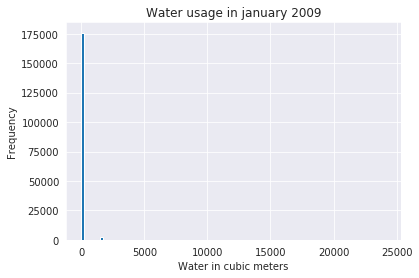

In [25]:
import matplotlib.pyplot as plt

bins=100
# store teh 6th column values in 'data' variable
data=final_result.iloc[:,6].values
type(data)

plt.hist(data,bins,range=[min(data),max(data)])
plt.title("Water usage in january 2009")
plt.xlabel("Water in cubic meters")
plt.ylabel("Frequency")
plt.show()

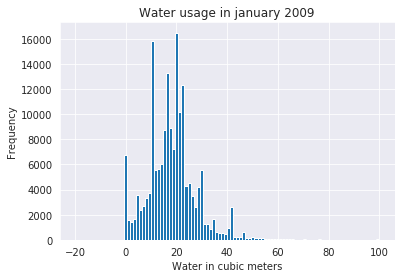

In [26]:
# Plot the histogram with ranges min(data)-20 and 100
plt.hist(data,bins,range=[min(data)-20,100])
plt.title("Water usage in january 2009")
plt.xlabel("Water in cubic meters")
plt.ylabel("Frequency")
plt.show()

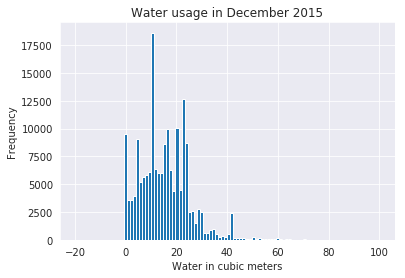

In [27]:
data=final_result.iloc[:,88].values

plt.hist(data,bins,range=[min(data)-20,100])
plt.title("Water usage in December 2015")
plt.xlabel("Water in cubic meters")
plt.ylabel("Frequency")
plt.show()

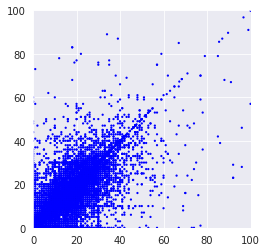

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

## the data
x=sample[["2009-01"]]
y=sample[["2010-01"]]

## left panel
ax1.set_xlim([0,100])
ax1.set_ylim([0,100])

ax1.scatter(x,y,color='blue',s=5,edgecolor='none')
ax1.set_aspect(1./ax1.get_data_ratio()) # make axes square

### Box plot

(0, 50)

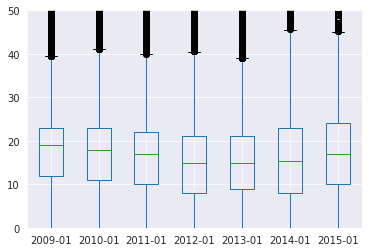

In [29]:
box_data = final_result[['2009-01', '2010-01','2011-01','2012-01','2013-01', '2014-01','2015-01']]
# box_data.head(1)
box_plot = box_data.plot.box()
box_plot.set_ylim(0,50)

### Line chart

In [30]:
line_data = final_result.iloc[:,5:89]
line_sum=line_data.std()
line_sum.head(5)

2009-01    316.948753
2009-02    210.343949
2009-03    159.950159
2009-04    180.440752
2009-05    216.134709
dtype: float64

In [31]:
type(line_sum.values)

numpy.ndarray

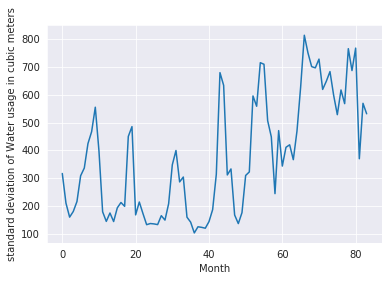

In [32]:
plt.plot(line_sum.values)
# plt.xticks(int(line_sum.index.values))
plt.ylabel('standard deviation of Water usage in cubic meters')
plt.xlabel('Month')
plt.show()

In [33]:
years_sd=final_result.copy().iloc[:,0:5]

# temp1=final_result.copy().iloc[:,5:17]
# temp2=final_result.copy().iloc[:,18:29]
# temp3=final_result.copy().iloc[:,30:41]
# temp4=final_result.copy().iloc[:,42:53]
# temp5=final_result.copy().iloc[:,54:65]
# temp6=final_result.copy().iloc[:,66:77]
# temp7=final_result.copy().iloc[:,78:89]

years_sd['2009']=temp1.sum(axis=1)
years_sd['2010']=temp2.sum(axis=1)
years_sd['2011']=temp3.sum(axis=1)
years_sd['2012']=temp4.sum(axis=1)
years_sd['2013']=temp5.sum(axis=1)
years_sd['2014']=temp6.sum(axis=1)
years_sd['2015']=temp7.sum(axis=1)
years_sd.head(5)

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,JAN16,2009,2010,2011,2012,2013,2014,2015
0,H3,DOMESTICO MEDIO,0.5,MSDELAUNET,197.0,240.0,220.0,150.0,110.0,157.0,20.0,132.0
4,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,240.0,220.0,220.0,220.0,240.0,316.0,304.0
5,H3,DOMESTICO MEDIO,0.5,NaN,NaN,201.0,231.0,294.0,182.0,201.0,211.0,209.0
6,H3,DOMESTICO RESIDENCIAL,0.5,NaN,NaN,240.0,220.0,384.0,337.0,221.0,186.0,192.0
7,H3,DOMESTICO RESIDENCIAL,0.5,CICASA MMD-15 S,702.0,330.0,330.0,206.0,125.0,50.0,73.0,259.0


In [34]:
sd_data=years_sd.std()

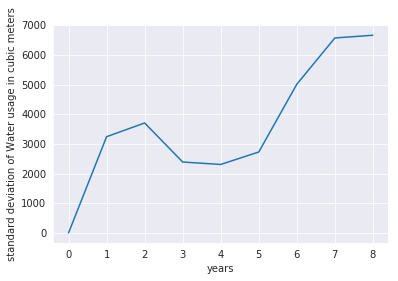

In [35]:
plt.plot(sd_data.values)
# plt.xticks(int(line_sum.index.values))
plt.ylabel('standard deviation of Water usage in cubic meters')
plt.xlabel('years')
plt.show()

# Save your notebook, then `File > Close and Halt`